In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
dp=pd.read_csv("diabetes.csv")

In [3]:
dp.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dp.shape

(768, 9)

In [5]:
# Exploring the missing values in the diabetes dataset  
dp.isnull().sum()  

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Replacing 0 values with the mean of that column  
  
# Replacing 0 values of Glucose  
dp['Glucose'] = dp['Glucose'].replace(0, dp['Glucose'].median())  
  
# Filling 0 values of Blood Pressure  
dp['BloodPressure'] = dp['BloodPressure'].replace(0, dp['BloodPressure'].median())   
  
# Replacing 0 values in BMI  
dp['BMI'] = dp['BMI'].replace(0, dp['BMI'].mean())  
  
# Replacing the missing values of Insulin and SkinThickness  
dp['SkinThickness'] = dp['SkinThickness'].replace(0, dp['SkinThickness'].mean())  
dp['Insulin'] = dp['Insulin'].replace(0, dp['Insulin'].mean())  
dp.head()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1


In [7]:
# Reviewing the dataset statistics  
dp.describe()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'Correlation heatmap')

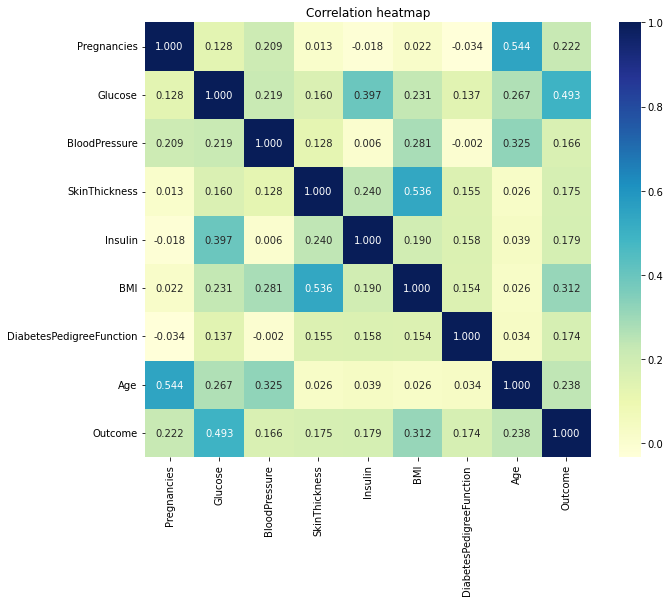

In [8]:
# Correlation plot of the independent variables  
  
plt.figure(figsize = (10, 8))  
sns.heatmap(dp.corr(), annot = True, fmt = ".3f", cmap = "YlGnBu")  
plt.title("Correlation heatmap")  

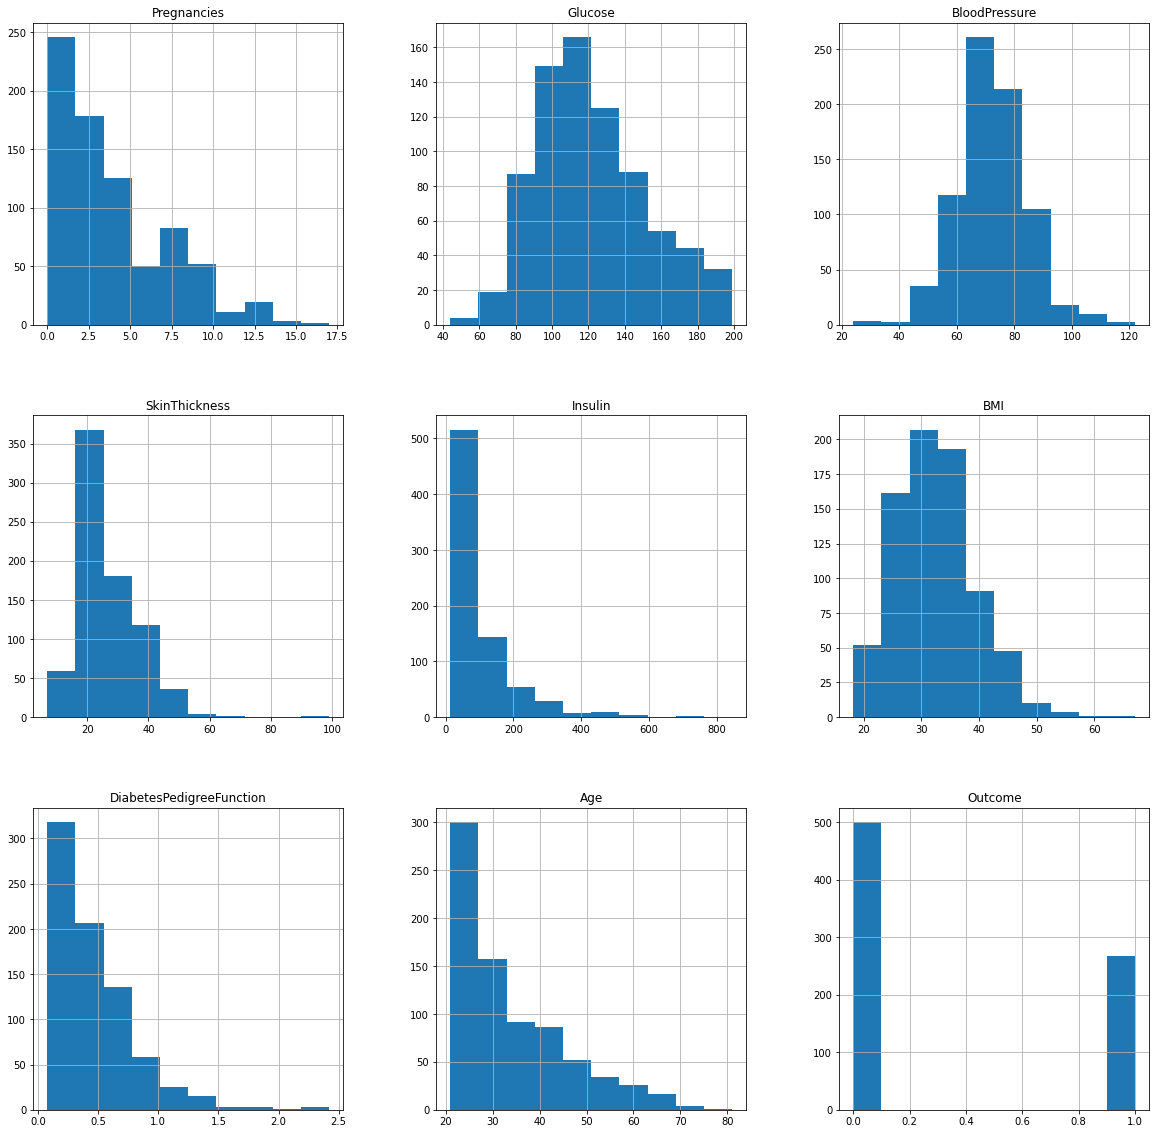

In [9]:
p = dp.hist(figsize = (20,20))


Outcome
0    500
1    268
Name: count, dtype: int64


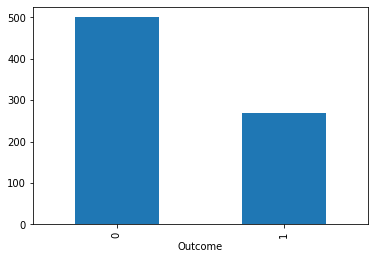

In [10]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = dp["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(dp.Outcome.value_counts())
p=dp.Outcome.value_counts().plot(kind="bar")

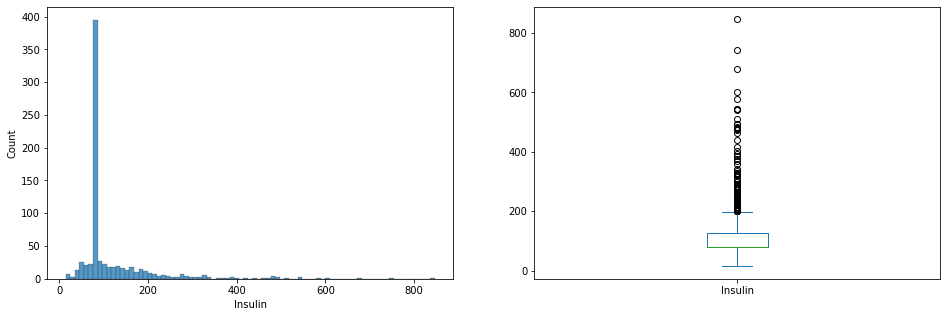

In [11]:
plt.subplot(121), sns.histplot(dp['Insulin'])
plt.subplot(122), dp['Insulin'].plot.box(figsize=(16,5))
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X=dp.drop('Outcome',axis=1)
Y=dp[['Outcome']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=7)


In [13]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train.values.ravel())

Y_predict=model.predict(X_test)
model_score=model.score(X_train,Y_train)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(model_score)
print(confusion_matrix(Y_test,Y_predict))

0.7783985102420856
[[127  20]
 [ 33  51]]


In [15]:
accuracy = accuracy_score(Y_test, Y_predict)
print("Accuracy:", accuracy)

Accuracy: 0.7705627705627706


In [16]:
df=pd.read_csv("SAMPLETEST(diabetes).csv")
Y_pred = model.predict(df)
Y_pred

array([0, 1, 1], dtype=int64)